# Group connection test
In this tutorial, we demonstrate the use of the ``graspologic.inference`` module to compare subgraph densities of two networks, both of which contain nodes belonging to some known set of families or groups. The number and identity of the families or groups must be the same in the two networks. The ``group_connection_test`` function can then be used to determine whether there are any statistical differences in the group-to-group connection densities of the two networks.


In [1]:
import numpy as np

from graspologic.inference.group_connection_test import group_connection_test
from graspologic.simulations import sbm
from graspologic.plot import heatmap

np.random.seed(8888)

%matplotlib inline

/home/runner/.cache/pypoetry/virtualenvs/graspologic-pkHfzCJ8-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## The stochastic block model (SBM)
A [**stochastic block model (SBM)**
](https://en.wikipedia.org/wiki/Stochastic_block_model)
is a popular statistical model of networks. Put simply, this model treats the
probability of an edge occuring between node $i$ and node $j$ as purely a function of
the *communities* or *groups* that node $i$ and $j$ belong to. Therefore, this model
is parameterized by:

   1. An assignment of each node in the network to a group. Note that this assignment
      can be considered to be deterministic or random, depending on the specific
      framing of the model one wants to use.
   2. A set of group-to-group connection probabilities

Let $n$ be the number of nodes, and $K$ be the number of groups in an SBM. For a
network $A$ sampled from an SBM:

$$ A \sim SBM(B, \tau)$$

We say that for all $(i,j), i \neq j$, with $i$ and $j$ both running
from $1 ... n$ the probability of edge $(i,j)$ occuring is:

$$ P[A_{ij} = 1] = P_{ij} = B_{\tau_i, \tau_j} $$

where $B \in [0,1]^{K \times K}$ is a matrix of group-to-group connection
probabilities and $\tau \in \{1...K\}^n$ is a vector of node-to-group assignments.
Note that here we are assuming $\tau$ is a fixed vector of assignments, though other
formuations of the SBM allow these assignments to themselves come from a categorical
distribution.


## Testing under the SBM model
Assuming this model, there are a few ways that one could test for differences between
two networks. In this example, we are interested in comparing the group-to-group
connection probability matrices, $B$,  for the two graphs.

We are interested in testing:

$$ H_0: B^{(L)} = B^{(R)}, \quad H_A: B^{(L)} \neq B^{(R)} $$

Rather than having to compare one proportion as in the density test, this test 
requires comparing all $K^2$ probabilities between the SBM models for both
networks.


The hypothesis test above can be decomposed into $K^2$ indpendent hypotheses. 
$B^{(L)}$ and $B^{(R)}$ are both $K \times K$ matrices, where each element $b_{kl}$ 
represents the probability of a connection from a node in group $k$ to one in group $l$. We
also know that group $k$ for the left network corresponds with group $k$ for the
right. In other words, the *groups* are matched. Thus, we are interested in testing,
for $k, l$ both running from $1...K$:

$$ H_0: B_{kl}^{(L)} = B_{kl}^{(R)}, \quad H_A: B_{kl}^{(L)} \neq B_{kl}^{(R)}$$



To perform the comparison, the user provides the adjacency matrices and label vectors for both networks. In this example, we will generate random networks with known properties to demonstrate the use of the ``group_connection_test`` function.

First, we generate and plot an adjacency matrix representing a network with two groups and a specified array of group-to-group connection probabilities.

<Axes: title={'center': '2-block SBM adjacency matrix'}>

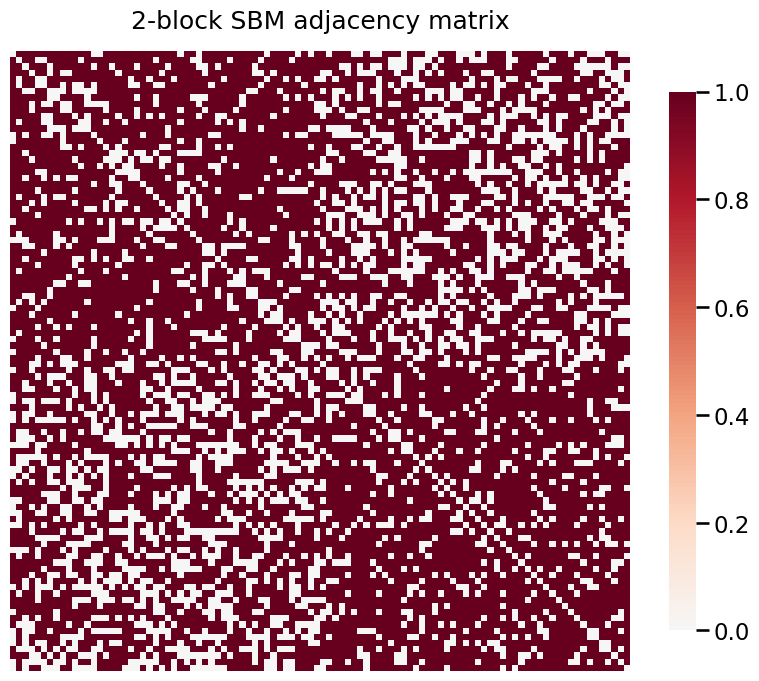

In [2]:
P = np.array([[0.8, 0.6],
              [0.6, 0.8]])
csize = [50] * 2
A1, labels1 = sbm(csize, P, return_labels = True)
heatmap(A1, title='2-block SBM adjacency matrix')


Next, we generate a second adjacency matrix for a second network. We will give this network a different number of nodes and a different connection probability matrix.

<Axes: title={'center': '2-block SBM adjacency matrix'}>

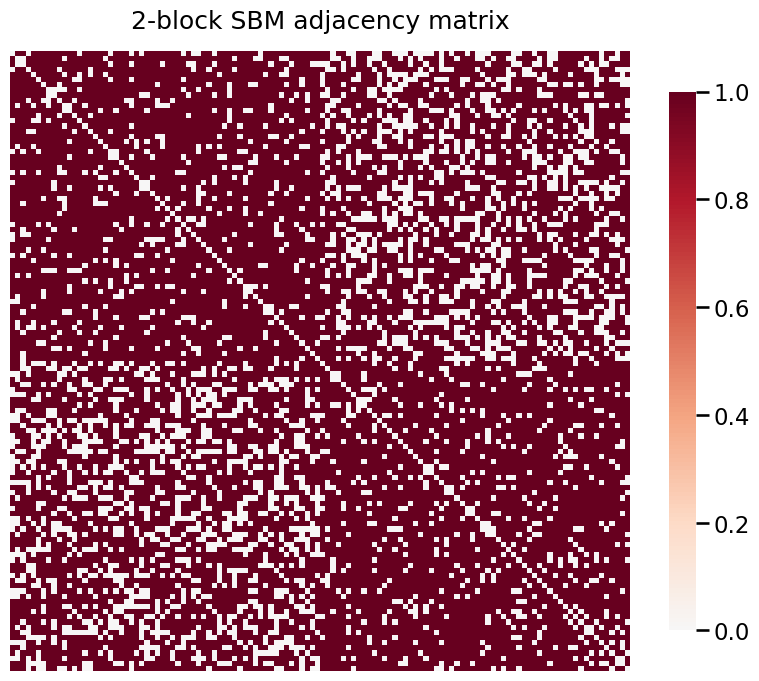

In [3]:
P = np.array([[0.865, 0.66],
              [0.66, 0.865]])
csize = [60] * 2
A2, labels2 = sbm(csize, P, return_labels = True)
heatmap(A2, title='2-block SBM adjacency matrix')

Now, we can run ``group_connection_test`` to assess whether there is a statistical difference between these two networks. Of course, we expect that there will be as, by design, their group-to-group connection densities are different.

In [4]:
stat, pvalue, misc = group_connection_test(A1, A2, labels1, labels2)
print(pvalue)

3.617921207995385e-13


/home/runner/work/graspologic/graspologic/graspologic/inference/group_connection_test.py:362: UserWarning: This test assumes that the networks are directed, but one or both adjacency matrices are symmetric.
  warnings.warn(msg)


This extremely low p-value suggests that we should reject the null hypothesis and conclude that the two networks are statistically different under the stochastic block model. The individual p-values which compare each group-to-group connection are also extremely low:

In [5]:
print(misc["corrected_pvalues"])

target             0             1
source                            
0       3.617921e-13  2.317673e-06
1       2.317673e-06  3.183079e-07
